In [1]:
from qiskit import *

In [2]:
%matplotlib inline

In [3]:
from qiskit.tools.visualization import plot_histogram

In [4]:
secretnumber = '10001001'

In [5]:
circuit = QuantumCircuit(len(secretnumber) + 1, len(secretnumber))
circuit.h(range(len(secretnumber)))

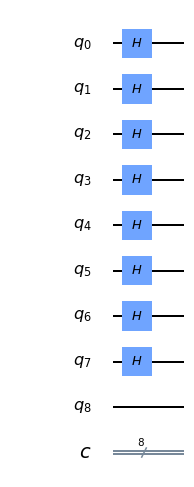

In [6]:
circuit.draw(output = 'mpl')

In [7]:
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

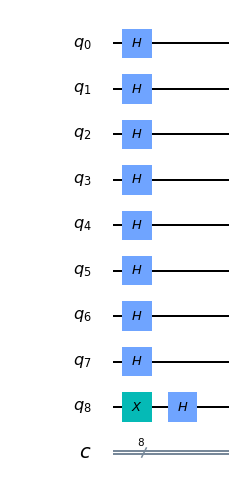

In [8]:
circuit.draw(output = 'mpl')

In [9]:
circuit.barrier()

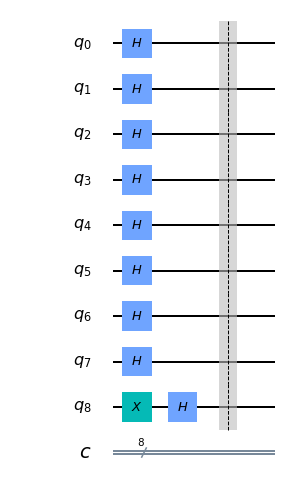

In [10]:
circuit.draw(output = 'mpl')

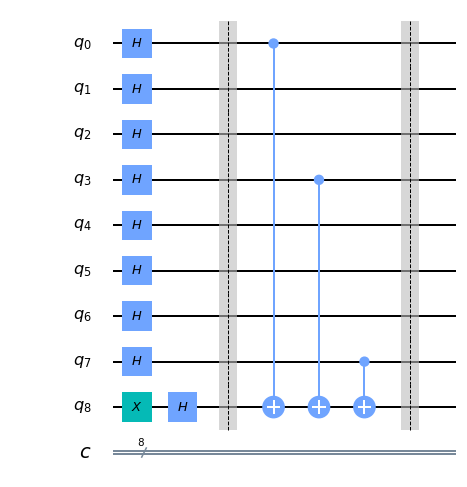

In [11]:
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))
#circuit.cx(5, 6)
#circuit.cx(3, 6)
#circuit.cx(0, 6)
circuit.barrier()
circuit.draw(output = 'mpl')

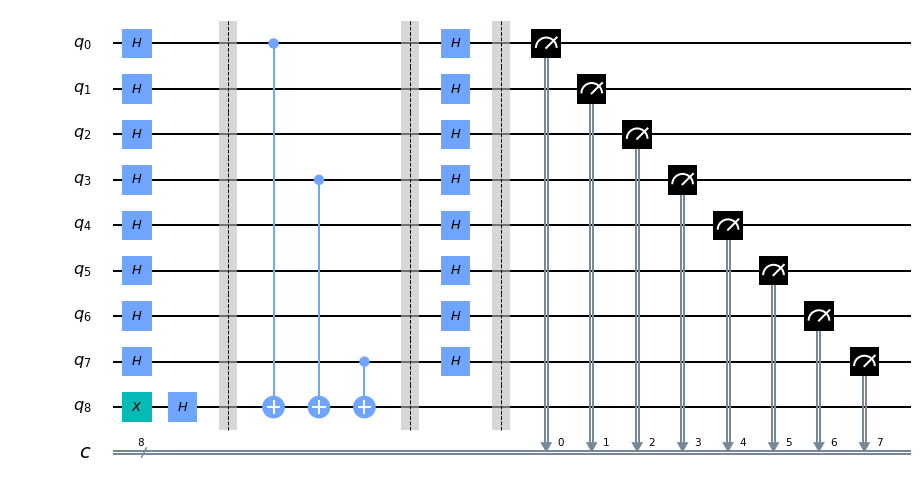

In [12]:
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))
circuit.draw(output = 'mpl')

In [13]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'10001001': 1}
